In [30]:
import requests
import json
import pandas as pd
import io

Download all species occurrence using EcoPlots API using the /species endpoint.


In [46]:
url = "http://127.0.0.1:5000/api/v1.0/species"

payload = json.dumps({})

headers = {
  'X-Api-Key': 'apikey',
  'Content-Type': 'application/json'
}

response = requests.request("POST", url, headers=headers, data=payload)

json.loads(response.text)

{'species': [{'count': 39386,
   'speciesname': 'Macropus rufus (Desmarest, 1822)'},
  {'count': 23743, 'speciesname': 'Gymnorhina tibicen (Latham, 1801)'},
  {'count': 17946, 'speciesname': 'Macropus fuliginosus (Desmarest, 1817)'},
  {'count': 16972, 'speciesname': 'Macropus robustus Gould, 1841'},
  {'count': 15862, 'speciesname': 'Rhipidura leucophrys (Latham, 1801)'},
  {'count': 15655, 'speciesname': 'Anthochaera carunculata (Shaw, 1790)'},
  {'count': 15273, 'speciesname': 'Platycercus elegans (J.F. Gmelin, 1788)'},
  {'count': 15116, 'speciesname': 'Colluricincla harmonica (Latham, 1801)'},
  {'count': 15068, 'speciesname': 'Mus musculus Linnaeus, 1766'},
  {'count': 13972, 'speciesname': 'Ocyphaps lophotes (Temminck, 1822)'},
  {'count': 13879, 'speciesname': 'Oryctolagus cuniculus (Linnaeus, 1758)'},
  {'count': 13708, 'speciesname': 'Pardalotus striatus (J.F. Gmelin, 1789)'},
  {'count': 13555, 'speciesname': 'Corvus mellori Mathews, 1912'},
  {'count': 13448, 'speciesname':

Read API response using pandas. <b>NOTE:</b> use lines=True to read ndjson data

In [47]:
df = pd.read_json(json.dumps(json.loads(response.text)["species"]))
print(f"Total number of different species: {len(df)}")

Total number of different species: 13422


Show top 10 species

In [48]:
df.head(10)


count                              speciesname
0  39386         Macropus rufus (Desmarest, 1822)
1  23743        Gymnorhina tibicen (Latham, 1801)
2  17946   Macropus fuliginosus (Desmarest, 1817)
3  16972            Macropus robustus Gould, 1841
4  15862      Rhipidura leucophrys (Latham, 1801)
5  15655     Anthochaera carunculata (Shaw, 1790)
6  15273  Platycercus elegans (J.F. Gmelin, 1788)
7  15116   Colluricincla harmonica (Latham, 1801)
8  15068              Mus musculus Linnaeus, 1766
9  13972       Ocyphaps lophotes (Temminck, 1822)

Show total species occurrence

In [49]:
df['count'].sum()

1943326

Download all plant species occurrence from Tern Surveillance Monitoring Dataset

In [50]:
url = "http://127.0.0.1:5000/api/v1.0/species"

payload = json.dumps({
  "query": {
    "dataset": [
      "http://linked.data.gov.au/dataset/ausplots"
    ],
    "feature_type": [
      "http://linked.data.gov.au/def/tern-cv/b311c0d3-4a1a-4932-a39c-f5cdc1afa611"
    ]}
  })

headers = {
  'X-Api-Key': 'apikey',
  'Content-Type': 'application/json'
}

response = requests.request("POST", url, headers=headers, data=payload)

json.loads(response.text)

{'species': [{'count': 9133, 'speciesname': 'Triodia basedowii'},
  {'count': 7831, 'speciesname': 'Eucalyptus tetrodonta'},
  {'count': 6178, 'speciesname': 'Poaceae'},
  {'count': 5262, 'speciesname': 'Acacia aptaneura'},
  {'count': 5056, 'speciesname': 'Eucalyptus baxteri'},
  {'count': 4963, 'speciesname': 'Dead Tree/Shrub'},
  {'count': 4860, 'speciesname': 'Eulalia aurea'},
  {'count': 4733, 'speciesname': 'Triodia pungens'},
  {'count': 4695, 'speciesname': 'Eucalyptus obliqua'},
  {'count': 4615, 'speciesname': 'Eucalyptus largiflorens'},
  {'count': 4453, 'speciesname': 'Casuarina pauper'},
  {'count': 4367, 'speciesname': 'Acacia shirleyi'},
  {'count': 4350, 'speciesname': 'Cenchrus ciliaris'},
  {'count': 4126, 'speciesname': 'Schizachyrium fragile'},
  {'count': 4125, 'speciesname': 'Eucalyptus diversifolia'},
  {'count': 3929, 'speciesname': 'Triodia bitextura'},
  {'count': 3659, 'speciesname': 'Acacia aneura'},
  {'count': 3558, 'speciesname': 'Eucalyptus coolabah'},
 

Read API response using pandas.

In [51]:
df = pd.read_json(json.dumps(json.loads(response.text)["species"]))
print(f"Total number of different species: {len(df)}")

Total number of different species: 4717


Show top 10 species

In [52]:
df.head(10)


count              speciesname
0   9133        Triodia basedowii
1   7831    Eucalyptus tetrodonta
2   6178                  Poaceae
3   5262         Acacia aptaneura
4   5056       Eucalyptus baxteri
5   4963          Dead Tree/Shrub
6   4860            Eulalia aurea
7   4733          Triodia pungens
8   4695       Eucalyptus obliqua
9   4615  Eucalyptus largiflorens

Show total species occurrence

In [53]:
df['count'].sum()

577540

Download all plant species occurrence from Tern Surveillance Monitoring Dataset (only filter by Eucalyptus or Acacia species)

In [60]:
url = "http://127.0.0.1:5000/api/v1.0/species?speciesname=Eucalyptus&speciesname=Acacia"

payload = json.dumps({
  "query": {
    "dataset": [
      "http://linked.data.gov.au/dataset/ausplots"
    ],
    "feature_type": [
      "http://linked.data.gov.au/def/tern-cv/b311c0d3-4a1a-4932-a39c-f5cdc1afa611"
    ]
    }
  })

headers = {
  'X-Api-Key': 'apikey',
  'Content-Type': 'application/json'
}

response = requests.request("POST", url, headers=headers, data=payload)

json.loads(response.text)

{'species': [{'count': 7831, 'speciesname': 'Eucalyptus tetrodonta'},
  {'count': 5262, 'speciesname': 'Acacia aptaneura'},
  {'count': 5056, 'speciesname': 'Eucalyptus baxteri'},
  {'count': 4695, 'speciesname': 'Eucalyptus obliqua'},
  {'count': 4615, 'speciesname': 'Eucalyptus largiflorens'},
  {'count': 4367, 'speciesname': 'Acacia shirleyi'},
  {'count': 4125, 'speciesname': 'Eucalyptus diversifolia'},
  {'count': 3659, 'speciesname': 'Acacia aneura'},
  {'count': 3558, 'speciesname': 'Eucalyptus coolabah'},
  {'count': 3406, 'speciesname': 'Eucalyptus miniata'},
  {'count': 2684, 'speciesname': 'Eucalyptus leucoxylon subsp. leucoxylon'},
  {'count': 2652, 'speciesname': 'Eucalyptus socialis subsp. socialis'},
  {'count': 2398, 'speciesname': 'Eucalyptus crebra'},
  {'count': 2093, 'speciesname': 'Eucalyptus dumosa'},
  {'count': 2042, 'speciesname': 'Eucalyptus populnea'},
  {'count': 1910, 'speciesname': 'Eucalyptus odorata'},
  {'count': 1868, 'speciesname': 'Eucalyptus camaldu

Read API response using pandas.

In [57]:
df = pd.read_json(json.dumps(json.loads(response.text)["species"]))
print(f"Total number of different species: {len(df)}")

Total number of different species: 168


Download all species occurrence count for the species (Acacia georginae)

In [64]:
url = "http://127.0.0.1:5000/api/v1.0/species?speciesname=Acacia%20georginae"

payload = json.dumps({
  "query": {
    "dataset": [
      "http://linked.data.gov.au/dataset/ausplots"
    ],
    "feature_type": [
      "http://linked.data.gov.au/def/tern-cv/b311c0d3-4a1a-4932-a39c-f5cdc1afa611"
    ],   
    "exact_match": True
  }
})

headers = {
  'X-Api-Key': 'apikey',
  'Content-Type': 'application/json'
}

response = requests.request("POST", url, headers=headers, data=payload)

json.loads(response.text)

{'species': [{'count': 1517, 'speciesname': 'Acacia georginae'}],
 'status': 200}

Get all possible Observable properties for TERN Surveillance Monitoring and plant-occurrence feature of interest, related to the Species 'Acacia georginae'

In [66]:
url = "http://127.0.0.1:5000/api/v1.0/species/observed_property?speciesname=Acacia%20georginae"

payload = json.dumps({
  "query": {
    "dataset": [
      "http://linked.data.gov.au/dataset/ausplots"
    ],
    "feature_type": [
      "http://linked.data.gov.au/def/tern-cv/b311c0d3-4a1a-4932-a39c-f5cdc1afa611"
    ],   
    "exact_match": True
  }
})

headers = {
  'X-Api-Key': 'apikey',
  'Content-Type': 'application/json'
}

response = requests.request("POST", url, headers=headers, data=payload)

json.loads(response.text)

{'observed_property': [{'count': 1517,
   'label': 'scientific name',
   'observed_property': 'http://linked.data.gov.au/def/tern-cv/56195246-ec5d-4050-a1c6-af786fbec715'},
  {'count': 1517,
   'label': 'IUCN conservation status',
   'observed_property': 'http://linked.data.gov.au/def/tern-cv/6f59a7ac-7acf-4c98-8db6-002ebd9a315f'},
  {'count': 1517,
   'label': 'taxon',
   'observed_property': 'http://linked.data.gov.au/def/tern-cv/70646576-6dc7-4bc5-a9d8-c4c366850df0'},
  {'count': 1517,
   'label': 'dead plant',
   'observed_property': 'http://linked.data.gov.au/def/tern-cv/cd11241d-9df9-48b9-88b1-3e6646f21562'},
  {'count': 1478,
   'label': 'in-canopy sky',
   'observed_property': 'http://linked.data.gov.au/def/tern-cv/9b2ab960-da97-473a-81af-d50ab6041739'},
  {'count': 1478,
   'label': 'growth form',
   'observed_property': 'http://linked.data.gov.au/def/tern-cv/f81aa91e-5f57-4e49-bc6e-4d821d1f9de2'},
  {'count': 1198,
   'label': 'vegetative height',
   'observed_property': 'htt

In [92]:
url = "http://127.0.0.1:5000/api/v1.0/species/observations?speciesname=Acacia&dformat=ndjson"

payload = json.dumps({
  "query": {
    "region_type": [
      "http://linked.data.gov.au/dataset/bioregion/IBRA7"
    ],
    "region": [
      "http://linked.data.gov.au/dataset/bioregion/CYP"
    ],
    "dataset": [
      "http://linked.data.gov.au/dataset/ausplots"
    ],
    "feature_type": [
      "http://linked.data.gov.au/def/tern-cv/b311c0d3-4a1a-4932-a39c-f5cdc1afa611"
    ],
    "observed_property": [
      "http://linked.data.gov.au/def/tern-cv/56195246-ec5d-4050-a1c6-af786fbec715",
      "http://linked.data.gov.au/def/tern-cv/f81aa91e-5f57-4e49-bc6e-4d821d1f9de2"
    ],
    "exact_match": True
  }
})

headers = {
  'X-Api-Key': 'apikey',
  'Content-Type': 'application/json'
}

response = requests.request("POST", url, headers=headers, data=payload)

response.text

'{"datasetId": "http://linked.data.gov.au/dataset/ausplots", "dataset": "TERN Surveillance Monitoring", "projectId": null, "project": null, "latitude": "-14.1263", "longitude": "143.155", "elevation": null, "featureId": "http://linked.data.gov.au/dataset/ausplots/site_visit_id-58594-plant_occurr_id-54831011", "featureTypeId": "http://linked.data.gov.au/def/tern-cv/b311c0d3-4a1a-4932-a39c-f5cdc1afa611", "featureType": "plant occurrence", "parentFeatureId": null, "observationId": "http://linked.data.gov.au/dataset/ausplots/point_intercept-obs-growth_form-54831011", "resultTime": "2018-06-12T00:00:00", "parameterId": "http://linked.data.gov.au/def/tern-cv/f81aa91e-5f57-4e49-bc6e-4d821d1f9de2", "parameter": "growth form", "result": "Tree/Palm", "resultUnitId": null, "resultUnit": null, "methodId": "http://linked.data.gov.au/def/ausplots-cv/c5a32483-bf2f-421d-b03d-6d81e1195de2", "method": "Point intercept", "systemTypeId": null, "systemType": null, "systemId": null, "system": null, "samplin

In [93]:
df = pd.read_json(io.BytesIO(response.content), lines=True)
len(df)

1292

In [94]:
df.head(10)

datasetId                       dataset  \
0  http://linked.data.gov.au/dataset/ausplots  TERN Surveillance Monitoring   
1  http://linked.data.gov.au/dataset/ausplots  TERN Surveillance Monitoring   
2  http://linked.data.gov.au/dataset/ausplots  TERN Surveillance Monitoring   
3  http://linked.data.gov.au/dataset/ausplots  TERN Surveillance Monitoring   
4  http://linked.data.gov.au/dataset/ausplots  TERN Surveillance Monitoring   
5  http://linked.data.gov.au/dataset/ausplots  TERN Surveillance Monitoring   
6  http://linked.data.gov.au/dataset/ausplots  TERN Surveillance Monitoring   
7  http://linked.data.gov.au/dataset/ausplots  TERN Surveillance Monitoring   
8  http://linked.data.gov.au/dataset/ausplots  TERN Surveillance Monitoring   
9  http://linked.data.gov.au/dataset/ausplots  TERN Surveillance Monitoring   

   projectId  project  latitude  longitude  elevation  \
0        NaN      NaN  -14.1263    143.155        NaN   
1        NaN      NaN  -14.1263    143.155        NaN   
2        NaN      NaN  -14.1263    143.155        NaN   
3        NaN      NaN  -14.1263    143.155        NaN   
4        NaN      NaN  -14.1263    143.155        NaN   
5        NaN      NaN  -14.1263    143.155        NaN   
6        NaN      NaN  -14.1263    143.155        NaN   
7        NaN      NaN  -14.1263    143.155        NaN   
8        NaN      NaN  -14.1263    143.155        NaN   
9        NaN      NaN  -14.1263    143.155        NaN   

                                           featureId  \
0  http://linked.data.gov.au/dataset/ausplots/sit...   
1  http://linked.data.gov.au/dataset/ausplots/sit...   
2  http://linked.data.gov.au/dataset/ausplots/sit...   
3  http://linked.data.gov.au/dataset/ausplots/sit...   
4  http://linked.data.gov.au/dataset/ausplots/sit...   
5  http://linked.data.gov.au/dataset/ausplots/sit...   
6  http://linked.data.gov.au/dataset/ausplots/sit...   
7  http://linked.data.gov.au/dataset/ausplots/sit...   
8  http://linked.data.gov.au/dataset/ausplots/sit...   
9  http://linked.data.gov.au/dataset/ausplots/sit...   

                                       featureTypeId       featureType  ...  \
0  http://linked.data.gov.au/def/tern-cv/b311c0d3...  plant occurrence  ...   
1  http://linked.data.gov.au/def/tern-cv/b311c0d3...  plant occurrence  ...   
2  http://linked.data.gov.au/def/tern-cv/b311c0d3...  plant occurrence  ...   
3  http://linked.data.gov.au/def/tern-cv/b311c0d3...  plant occurrence  ...   
4  http://linked.data.gov.au/def/tern-cv/b311c0d3...  plant occurrence  ...   
5  http://linked.data.gov.au/def/tern-cv/b311c0d3...  plant occurrence  ...   
6  http://linked.data.gov.au/def/tern-cv/b311c0d3...  plant occurrence  ...   
7  http://linked.data.gov.au/def/tern-cv/b311c0d3...  plant occurrence  ...   
8  http://linked.data.gov.au/def/tern-cv/b311c0d3...  plant occurrence  ...   
9  http://linked.data.gov.au/def/tern-cv/b311c0d3...  plant occurrence  ...   

   samplingId samplingMethodId samplingMethod  \
0         NaN              NaN            NaN   
1         NaN              NaN            NaN   
2         NaN              NaN            NaN   
3         NaN              NaN            NaN   
4         NaN              NaN            NaN   
5         NaN              NaN            NaN   
6         NaN              NaN            NaN   
7         NaN              NaN            NaN   
8         NaN              NaN            NaN   
9         NaN              NaN            NaN   

                                              siteId    siteName  \
0  http://linked.data.gov.au/dataset/ausplots/sit...  QDACYP0009   
1  http://linked.data.gov.au/dataset/ausplots/sit...  QDACYP0009   
2  http://linked.data.gov.au/dataset/ausplots/sit...  QDACYP0009   
3  http://linked.data.gov.au/dataset/ausplots/sit...  QDACYP0009   
4  http://linked.data.gov.au/dataset/ausplots/sit...  QDACYP0009   
5  http://linked.data.gov.au/dataset/ausplots/sit...  QDACYP0009   
6  http://linked.data.gov.au/datase

In [95]:
df['parameter'].unique().tolist()

['growth form', 'scientific name']

In [102]:
df_pivot = (df.pivot(index='featureId', columns=["parameter"], values="result"))
print(len(df_pivot))
df_pivot.head(10)

660


parameter                                          growth form  \
featureId                                                        
http://linked.data.gov.au/dataset/ausplots/site...       Shrub   
http://linked.data.gov.au/dataset/ausplots/site...       Shrub   
http://linked.data.gov.au/dataset/ausplots/site...       Shrub   
http://linked.data.gov.au/dataset/ausplots/site...       Shrub   
http://linked.data.gov.au/dataset/ausplots/site...       Shrub   
http://linked.data.gov.au/dataset/ausplots/site...       Shrub   
http://linked.data.gov.au/dataset/ausplots/site...       Shrub   
http://linked.data.gov.au/dataset/ausplots/site...       Shrub   
http://linked.data.gov.au/dataset/ausplots/site...       Shrub   
http://linked.data.gov.au/dataset/ausplots/site...       Shrub   

parameter                                              scientific name  
featureId                                                               
http://linked.data.gov.au/dataset/ausplots/site...  Acacia crassicarpa  
http://linked.data.gov.au/dataset/ausplots/site...  Acacia crassicarpa  
http://linked.data.gov.au/dataset/ausplots/site...  Acacia crassicarpa  
http://linked.data.gov.au/dataset/ausplots/site...  Acacia crassicarpa  
http://linked.data.gov.au/dataset/ausplots/site...      Acacia legnota  
http://linked.data.gov.au/dataset/ausplots/site...  Acacia crassicarpa  
http://linked.data.gov.au/dataset/ausplots/site...  Acacia crassicarpa  
http://linked.data.gov.au/dataset/ausplots/site...      Acacia legnota  
http://linked.data.gov.au/dataset/ausplots/site...  Acacia crassicarpa  
http://linked.data.gov.au/dataset/ausplots/site...  Acacia crassicarpa

Join both dataframes

In [108]:
df_merged = df.merge(df_pivot, on='featureId').drop_duplicates(subset="featureId").drop(columns=["parameter", "parameterId", "result", "resultUnit", "resultUnitId"])

In [109]:
df_merged.head(10)

datasetId                       dataset  \
0   http://linked.data.gov.au/dataset/ausplots  TERN Surveillance Monitoring   
2   http://linked.data.gov.au/dataset/ausplots  TERN Surveillance Monitoring   
4   http://linked.data.gov.au/dataset/ausplots  TERN Surveillance Monitoring   
6   http://linked.data.gov.au/dataset/ausplots  TERN Surveillance Monitoring   
8   http://linked.data.gov.au/dataset/ausplots  TERN Surveillance Monitoring   
10  http://linked.data.gov.au/dataset/ausplots  TERN Surveillance Monitoring   
12  http://linked.data.gov.au/dataset/ausplots  TERN Surveillance Monitoring   
14  http://linked.data.gov.au/dataset/ausplots  TERN Surveillance Monitoring   
16  http://linked.data.gov.au/dataset/ausplots  TERN Surveillance Monitoring   
18  http://linked.data.gov.au/dataset/ausplots  TERN Surveillance Monitoring   

    projectId  project  latitude  longitude  elevation  \
0         NaN      NaN  -14.1263    143.155        NaN   
2         NaN      NaN  -14.1263    143.155        NaN   
4         NaN      NaN  -14.1263    143.155        NaN   
6         NaN      NaN  -14.1263    143.155        NaN   
8         NaN      NaN  -14.1263    143.155        NaN   
10        NaN      NaN  -14.1263    143.155        NaN   
12        NaN      NaN  -14.1263    143.155        NaN   
14        NaN      NaN  -14.1263    143.155        NaN   
16        NaN      NaN  -14.1263    143.155        NaN   
18        NaN      NaN  -14.1263    143.155        NaN   

                                            featureId  \
0   http://linked.data.gov.au/dataset/ausplots/sit...   
2   http://linked.data.gov.au/dataset/ausplots/sit...   
4   http://linked.data.gov.au/dataset/ausplots/sit...   
6   http://linked.data.gov.au/dataset/ausplots/sit...   
8   http://linked.data.gov.au/dataset/ausplots/sit...   
10  http://linked.data.gov.au/dataset/ausplots/sit...   
12  http://linked.data.gov.au/dataset/ausplots/sit...   
14  http://linked.data.gov.au/dataset/ausplots/sit...   
16  http://linked.data.gov.au/dataset/ausplots/sit...   
18  http://linked.data.gov.au/dataset/ausplots/sit...   

                                        featureTypeId       featureType  ...  \
0   http://linked.data.gov.au/def/tern-cv/b311c0d3...  plant occurrence  ...   
2   http://linked.data.gov.au/def/tern-cv/b311c0d3...  plant occurrence  ...   
4   http://linked.data.gov.au/def/tern-cv/b311c0d3...  plant occurrence  ...   
6   http://linked.data.gov.au/def/tern-cv/b311c0d3...  plant occurrence  ...   
8   http://linked.data.gov.au/def/tern-cv/b311c0d3...  plant occurrence  ...   
10  http://linked.data.gov.au/def/tern-cv/b311c0d3...  plant occurrence  ...   
12  http://linked.data.gov.au/def/tern-cv/b311c0d3...  plant occurrence  ...   
14  http://linked.data.gov.au/def/tern-cv/b311c0d3...  plant occurrence  ...   
16  http://linked.data.gov.au/def/tern-cv/b311c0d3...  plant occurrence  ...   
18  http://linked.data.gov.au/def/tern-cv/b311c0d3...  plant occurrence  ...   

    samplingMethod                                             siteId  \
0              NaN  http://linked.data.gov.au/dataset/ausplots/sit...   
2              NaN  http://linked.data.gov.au/dataset/ausplots/sit...   
4              NaN  http://linked.data.gov.au/dataset/ausplots/sit...   
6              NaN  http://linked.data.gov.au/dataset/ausplots/sit...   
8              NaN  http://linked.data.gov.au/dataset/ausplots/sit...   
10             NaN  http://linked.data.gov.au/dataset/ausplots/sit...   
12             NaN  http://linked.data.gov.au/dataset/ausplots/sit...   
14             NaN  http://linked.data.gov.au/dataset/ausplots/sit...   
16             NaN  http://linked.data.gov.au/dataset/ausplots/sit...   
18             NaN  http://linked.data.gov.au/dataset/ausplots/sit...   

      siteName                                        siteVisitId  \
0   QDACYP0009  http://linked.data.gov.au/dataset/ausplots/sv-...   
2   QDACYP0009  http://linked.data.gov.au/dataset/ausplots/sv-... 

plot the species occurrence

In [110]:
import matplotlib as plt
df_merged.plot(x="longitude", y="latitude", kind="scatter")

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

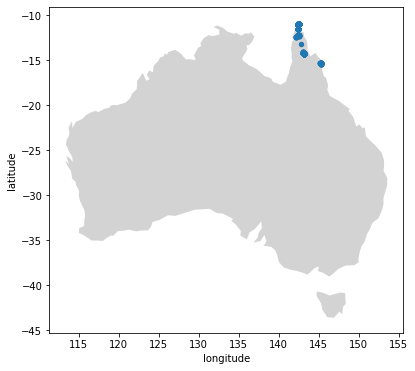

In [111]:
import matplotlib.pyplot as plt
import geopandas as gpd

# initialize an axis
fig, ax = plt.subplots(figsize=(8,6))

# plot map on axis
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
countries[countries["name"] == "Australia"].plot(color="lightgrey", ax=ax)
df_merged[["latitude", "longitude"]].plot.scatter(x="longitude", y="latitude", ax=ax)

# add grid
plt.show()